In [1]:
from qiskit import QuantumCircuit
from qiskit.circuit import Parameter
import matplotlib.pyplot as plt

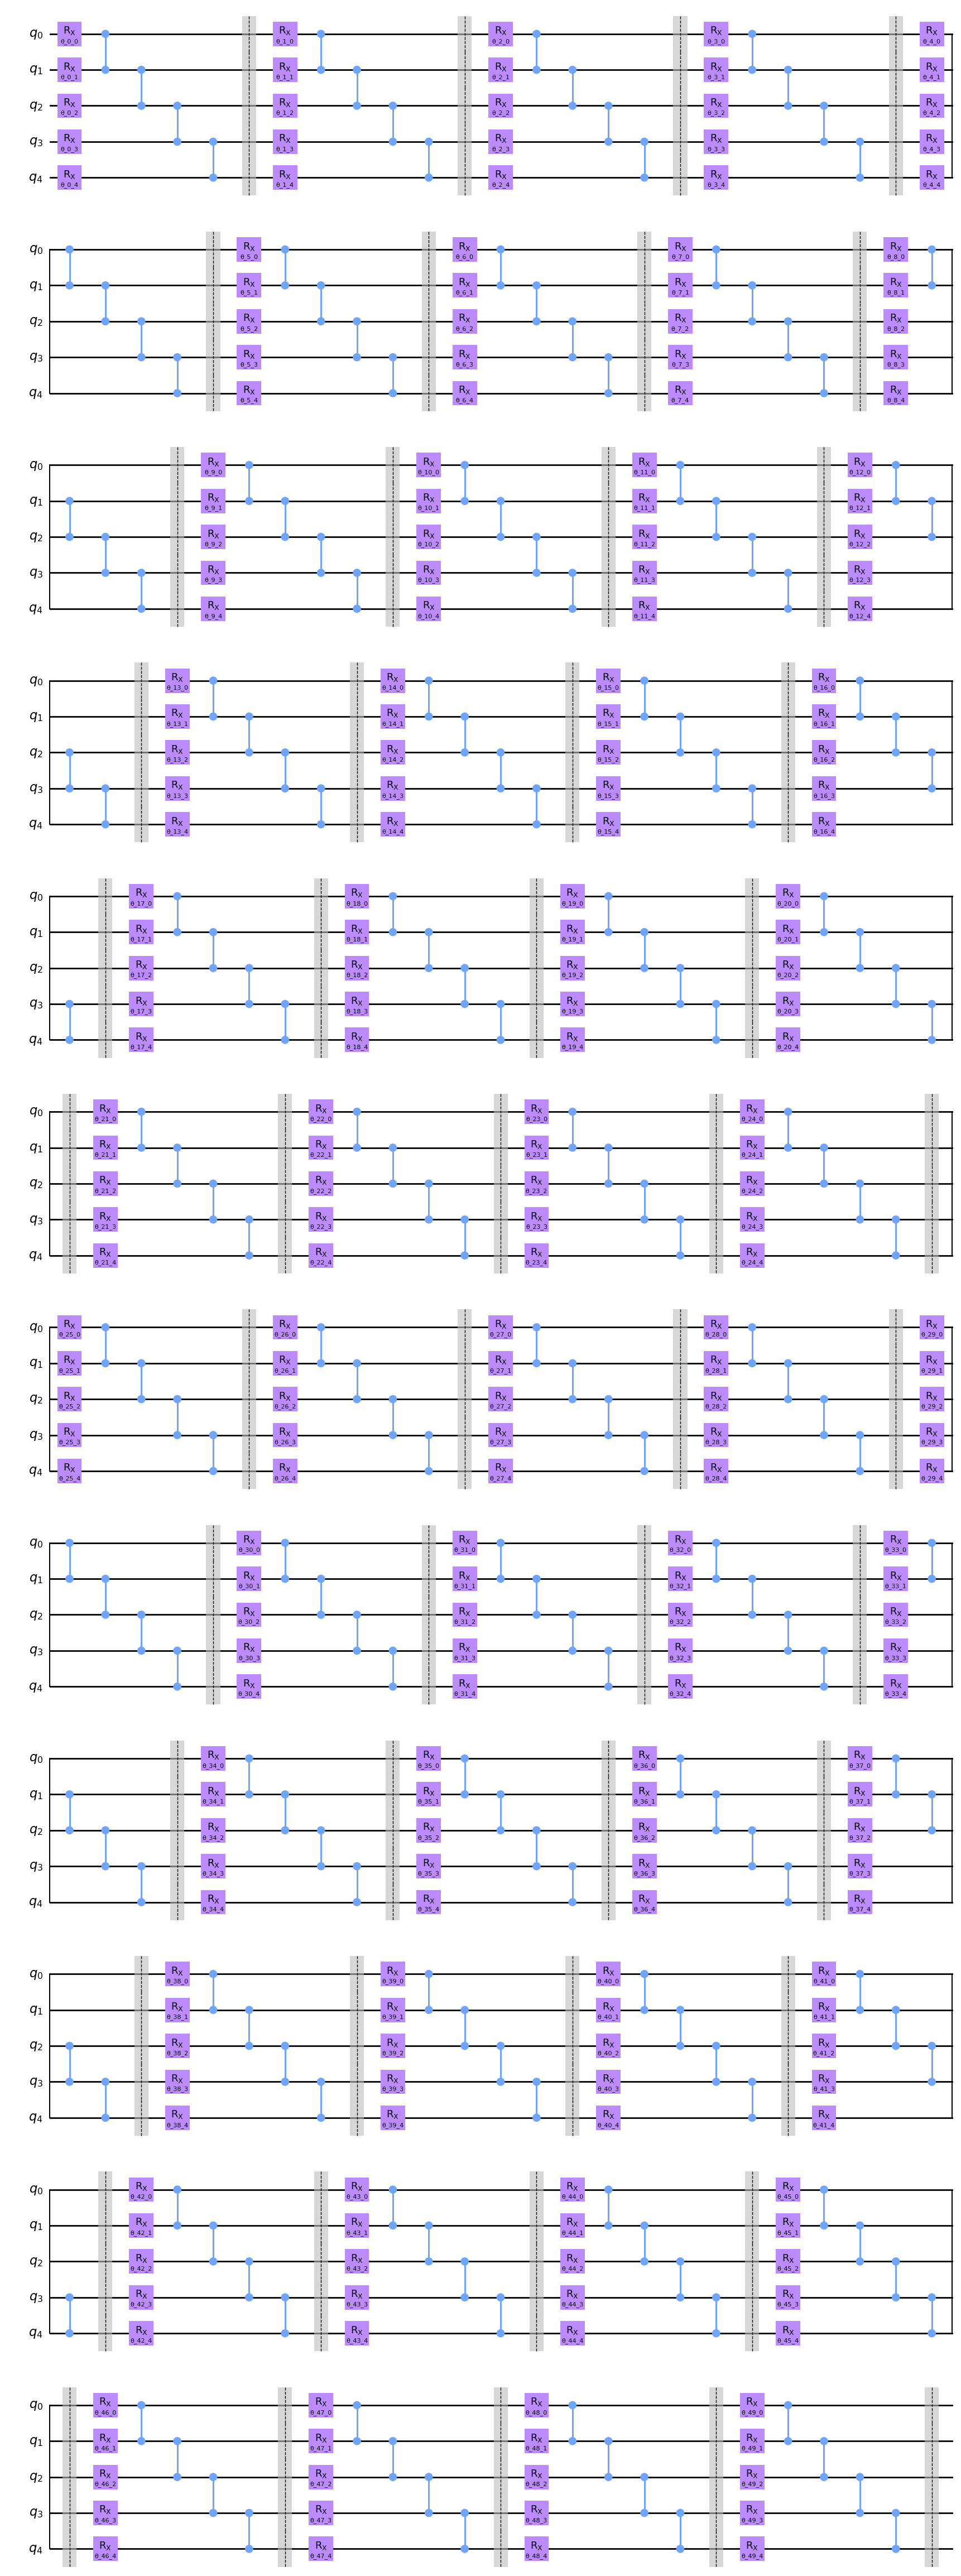

In [9]:
def build_deep_ansatz(num_qubits):
    """Crea un circuito con L = 10n capas de ansatz para n qubits."""
    L = 10 * num_qubits  # número de capas
    qc = QuantumCircuit(num_qubits)
    thetas = []

    def layer(qc, theta_list):
        # RX en cada qubit
        for i in range(num_qubits):
            qc.rx(theta_list[i], i)
        # CZ entre qubits adyacentes
        for i in range(num_qubits - 1):
            qc.cz(i, i + 1)

    for layer_index in range(L):
        theta_layer = [Parameter(f'θ_{layer_index}_{i}') for i in range(num_qubits)]
        thetas.append(theta_layer)
        layer(qc, theta_layer)
        qc.barrier()

    return qc, thetas

qc, theta_params = build_deep_ansatz(5)
qc.draw('mpl')